# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

In [ ]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"], "shuffle_genes"

## Input data

In [4]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [5]:
INPUT_FILEPATH = Path(
    NULL_DIR,
    "data_transformations",
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [6]:
# output dir for this notebook
RESULTS_DIR = Path(
    NULL_DIR, "data_transformations", "umap"
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap')

## UMAP options

In [7]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [8]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [9]:
data = pd.read_pickle(INPUT_FILEPATH)

In [10]:
display(data.shape)

(3752, 987)

In [11]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.175043,-0.710171,-1.000846,0.693026,0.409413,0.642958,1.767862,-1.070425,0.809395,-1.555050,...,-0.932802,0.371349,-0.521787,-0.881136,-1.193309,-0.257883,1.382268,0.066549,-0.866086,0.847997
100002_raw-Energy,0.531227,0.894062,1.191552,-0.143922,0.217867,0.529878,0.219561,-1.538143,-0.166704,1.042749,...,-0.601329,0.625139,-0.113048,-1.477163,0.746773,0.316892,-0.660407,1.501067,0.543744,1.094294
100003_raw-Protein,0.405395,0.925288,-0.339507,0.799476,-0.512075,0.586632,0.361706,0.226860,1.208289,-1.880931,...,-0.489171,0.276717,-0.159505,-1.271106,0.300351,0.595915,0.509020,-0.127540,-0.811987,-1.108812
100004_raw-Fat,-0.156230,0.881426,0.395527,-1.570256,1.240955,2.064595,-0.547373,-1.228389,0.319684,0.858253,...,-0.407151,-1.217662,-0.361052,0.813221,-0.692981,1.099523,-0.017366,0.361278,-0.017222,1.750511
100005_raw-Carbohydrate,-0.142531,-0.521907,1.069304,0.548122,-0.422146,-1.330718,-1.260872,1.003617,1.266289,0.065408,...,1.506698,-0.069854,-0.084662,-1.269536,-0.421185,0.431180,1.673162,-0.954336,0.026593,0.655359


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [12]:
from data.dimreduction import get_umap_proj

In [13]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3752, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,6.544911,5.133636,2.891425,5.334098,4.344848
std,0.658433,0.656425,0.990582,0.989878,1.544293
min,4.926399,3.465993,0.497285,3.385110,1.427251
25%,6.124429,4.730652,2.081500,4.565016,3.007985
50%,6.593641,5.147297,3.023347,5.175207,4.282852
75%,7.008191,5.658021,3.758150,5.834539,5.867491
max,8.142254,6.485654,4.542171,7.829319,7.671034


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3752, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.177543,5.057249,6.935622,4.736157,5.565940
std,0.942308,0.818197,0.804291,0.585469,1.217193
min,1.379975,3.040992,4.974003,3.284347,3.358765
25%,2.373378,4.709167,6.449334,4.357587,4.325182
50%,3.258042,5.029622,7.266948,4.661562,5.624377
75%,3.932700,5.751377,7.514246,5.209821,6.616412
max,4.956738,6.641728,8.304605,6.181771,7.894526


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3752, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.243102,5.091676,7.044979,4.704089,5.553354
std,0.546725,0.828008,0.579401,0.357462,0.627536
min,2.060598,3.814307,5.643654,3.542694,4.120864
25%,2.731804,4.400696,6.547352,4.540619,5.042331
50%,3.264016,4.758326,7.164628,4.719434,5.758438
75%,3.631407,5.914038,7.517277,4.952790,6.060840
max,4.303772,6.738804,8.092588,5.412407,6.562906


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3752, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.341055,5.024406,7.019809,4.661911,5.785397
std,0.160790,0.432864,0.418233,0.510615,0.857505
min,2.881829,3.863692,6.164124,3.441154,3.986236
25%,3.231706,4.721385,6.698355,4.388956,5.046432
50%,3.340676,5.032389,7.004872,4.762613,6.063488
75%,3.449952,5.397293,7.427140,5.067299,6.568033
max,3.758864,6.011785,7.798368,5.548273,7.097428


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3752, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.222454,5.142594,7.045966,4.660501,5.717358
std,0.287128,0.209117,0.363505,0.329307,0.646309
min,2.626850,4.593931,6.385653,4.034945,4.263581
25%,2.990391,4.975815,6.686954,4.382216,5.054378
50%,3.348655,5.098012,7.058376,4.636489,5.772742
75%,3.455298,5.347732,7.386237,4.955109,6.291376
max,3.869438,5.539492,7.731073,5.423161,6.820899


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3752, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,6.771013,5.001742,7.080844,4.691967,5.627549
std,0.218702,0.204697,0.269785,0.200276,0.776571
min,6.281976,4.457475,6.531519,4.055361,4.396916
25%,6.603496,4.866044,6.867110,4.584895,4.749072
50%,6.754275,5.011206,7.069828,4.730048,5.838060
75%,6.942155,5.122040,7.295024,4.838319,6.328480
max,7.247086,5.559407,7.792782,5.090534,6.823157


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [14]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [15]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

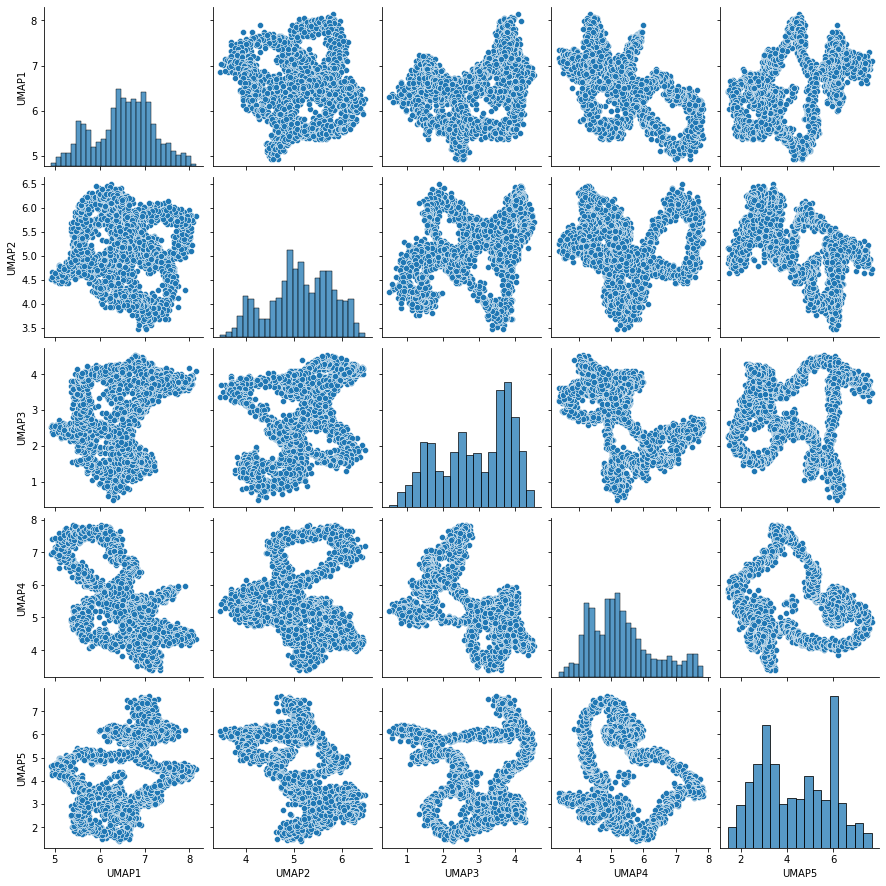

In [16]:
g = sns.pairplot(data=dr_data)

## Full plot (density)

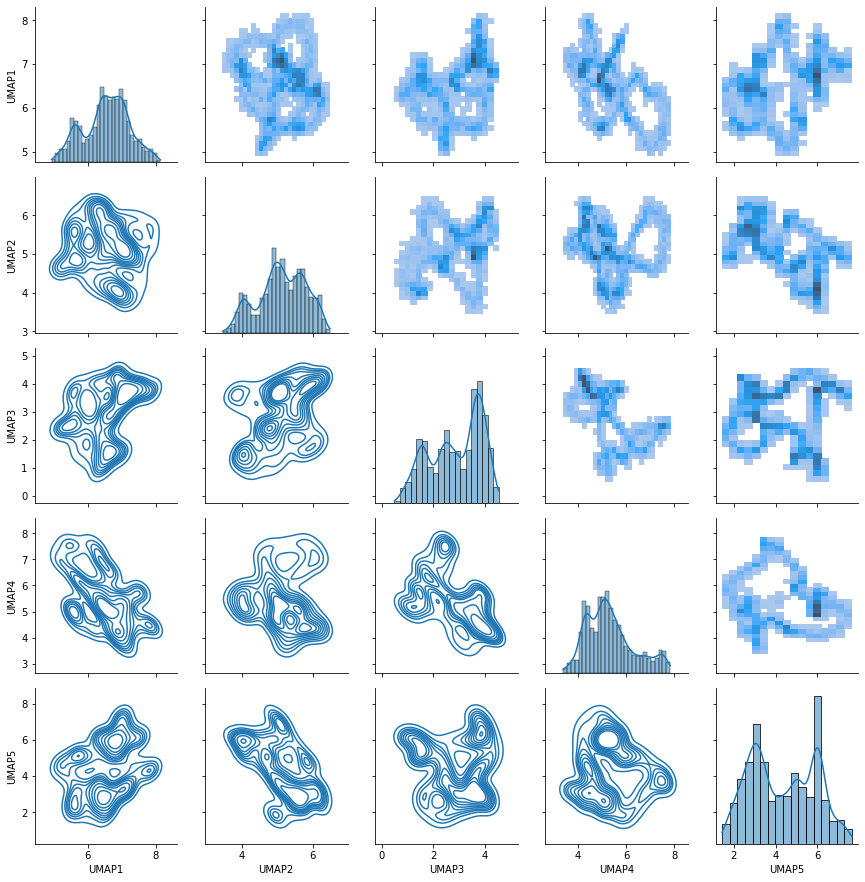

In [17]:
g = sns.PairGrid(data=dr_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)

## Density plot without "outliers"

In [18]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < 10) & (dr_data["UMAP2"] < 5)]

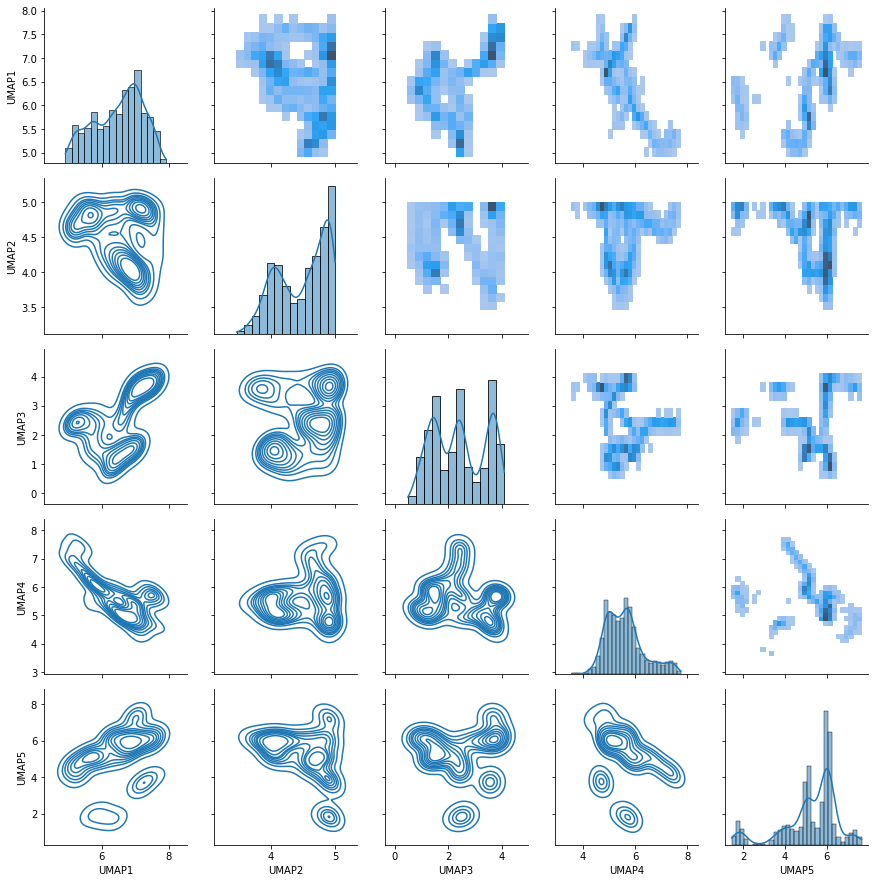

In [19]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)